### Imports

In [1]:
import glob
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

### Calculate Camera Matrix and Distortion Coefficents and undistort images

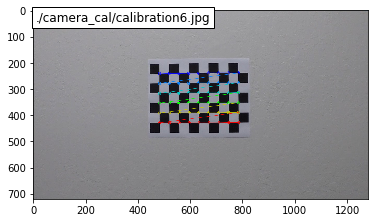

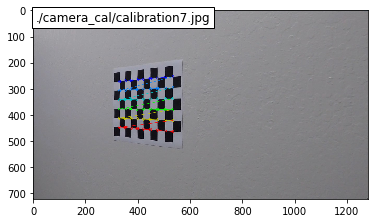

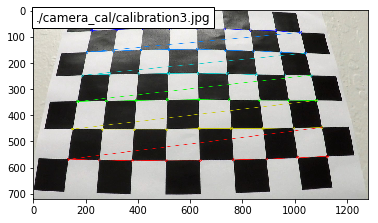

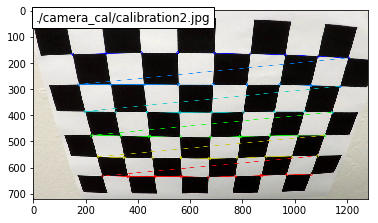

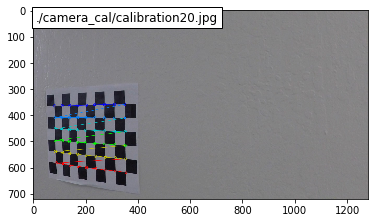

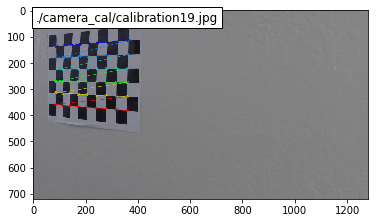

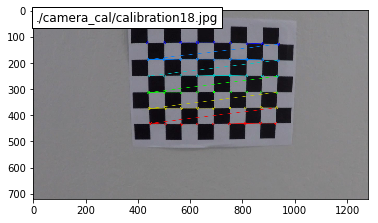

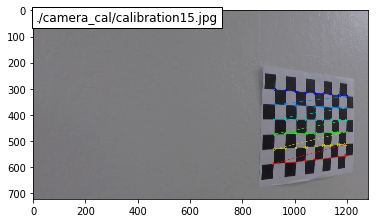

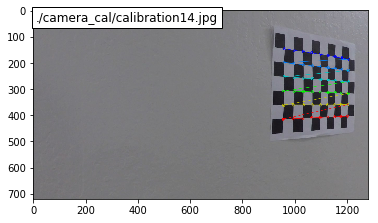

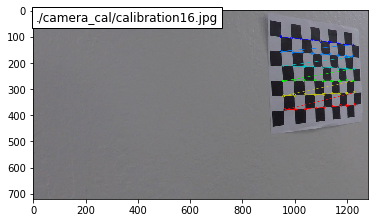

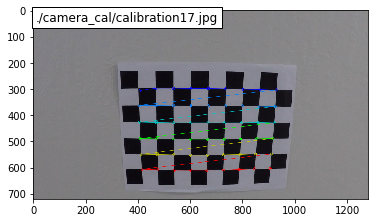

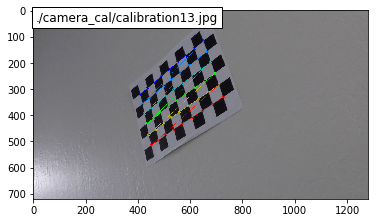

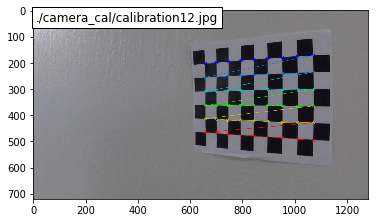

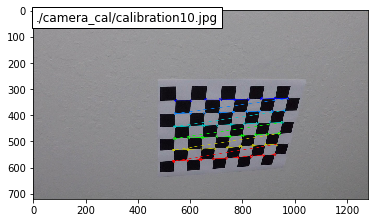

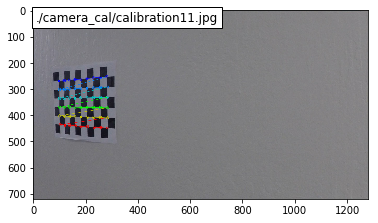

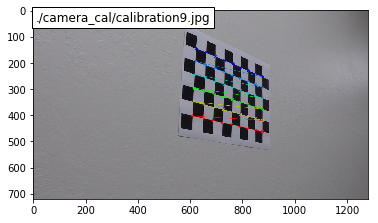

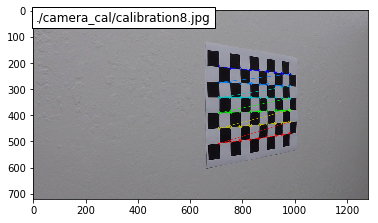

In [2]:
# Make a list of calibration image names
image_names = glob.glob('./camera_cal/calibration*.jpg')
# Arrays to store object points and image points from all the image
objpoints = [] # 3D points in real world space
imgpoints = [] # 2D points in image plane

# prepare object points, like (0,0,0),(1,0,0), ... ,(7,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2) # x,y coordinates
for image_name in image_names:
    # read in each image
    image = mpimg.imread(image_name)
    
    # convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)
    
    # if corners are found, add object points and image points
    if ret == True:
        imgpoints.append(corners)
        objpoints.append(objp)
        
        # draw and display the corner
        image = cv2.drawChessboardCorners(image,(9,6),corners,ret)
        plt.figure()
        plt.text(10,40,image_name,{'color':'black','size':12},bbox={'facecolor':'white'})
        plt.imshow(image)

### Use the obtained image points and object points to calibrate the camera and undistort some test images


<Figure size 432x288 with 0 Axes>

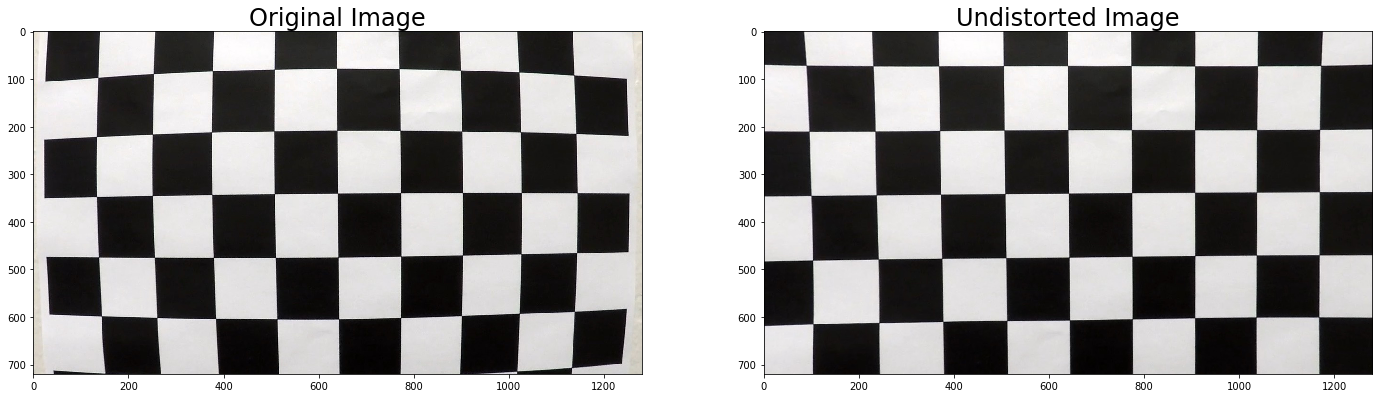

<Figure size 432x288 with 0 Axes>

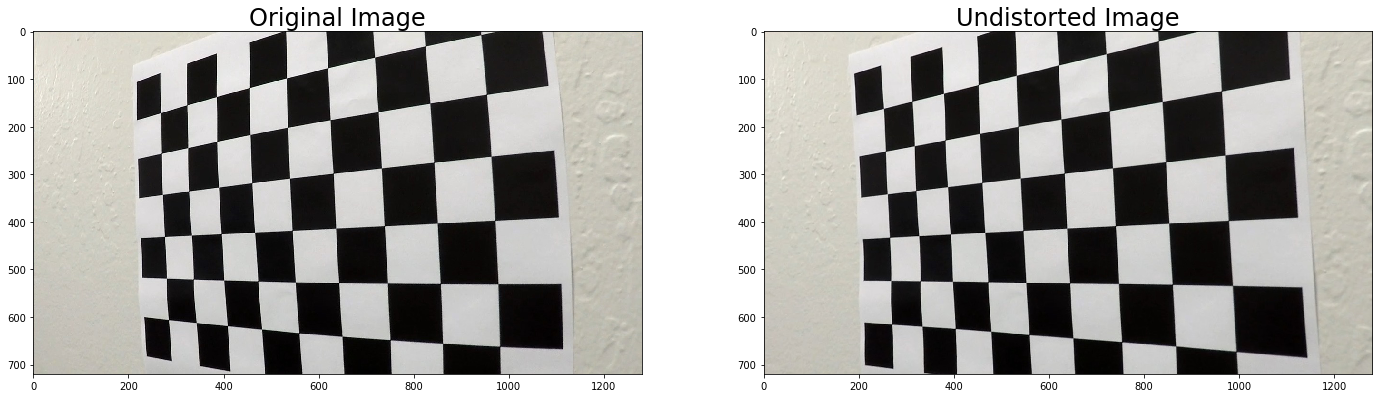

<Figure size 432x288 with 0 Axes>

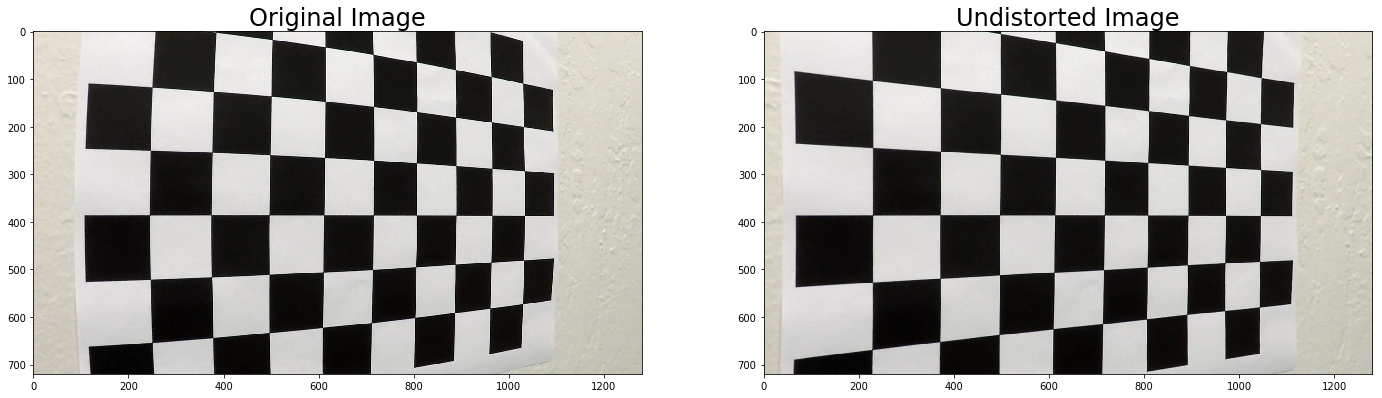

In [11]:
image_names = ['camera_cal/calibration1.jpg','camera_cal/calibration4.jpg','camera_cal/calibration5.jpg']

for image_name in image_names:
    image = mpimg.imread(image_name)
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints,imgpoints,image.shape[1::-1],None,None)
    undist = cv2.undistort(image,mtx,dist,None,mtx)
    plt.figure()
    f,(ax1,ax2) = plt.subplots(1,2,figsize = (24,9))
    ax1.set_title('Original Image',fontsize = 24)
    ax1.imshow(image)
    ax2.set_title('Undistorted Image',fontsize = 24)
    ax2.imshow(undist)

### Use color transforms and gradients to create thresholded binary images 